# Deep Learning
## HW2 - Problem 2 - FIFA WC Prediction (100pts)



1.   Full Name: Radmehr Karimian
2.   Student Number: 98103556




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/DeepLearning

/content/gdrive/MyDrive/DeepLearning


In [4]:
!ls

data  international_matches.csv  Q3_test.csv  Q3_train.csv


In [5]:
df = pd.read_csv('international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


Text(0, 0.5, 'Home ranking')

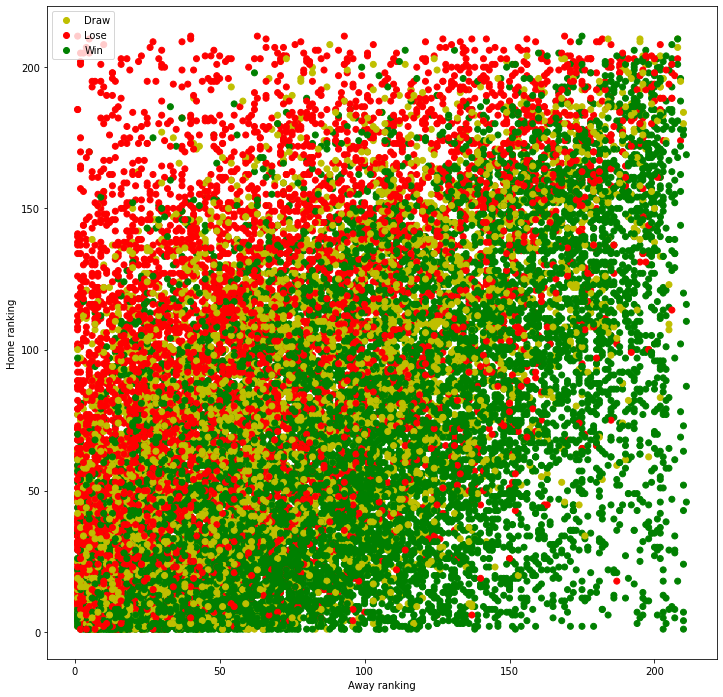

In [6]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

label = LabelEncoder()
cvalues = label.fit_transform(df['home_team_result'])
classes = ['Draw','Lose','Win']
away = df['away_team_fifa_rank']
home = df['home_team_fifa_rank']
plt.figure(figsize=(12,12))
colors = ListedColormap(['y','r','g'])
sctter = plt.scatter(away, home, c=cvalues, cmap=colors)
plt.legend(handles=sctter.legend_elements()[0], labels=classes)
plt.xlabel('Away ranking')
plt.ylabel('Home ranking')

In [7]:
df.columns
columns = ['home_team_total_fifa_points',
           'away_team_total_fifa_points',
           'away_team_fifa_rank',
           'home_team_fifa_rank',
           'home_team_result']
df_selected = df[columns]
zeros = (df_selected['away_team_total_fifa_points'] == 0)|(df_selected['home_team_total_fifa_points']==0)
df_selected.where(~zeros, inplace=True)
df_selected.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:9032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._where(cond, other, inplace, axis, level, errors=errors)
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_selected,
                               test_size = 0.25,
                               random_state=40)

In [9]:
import seaborn as sns

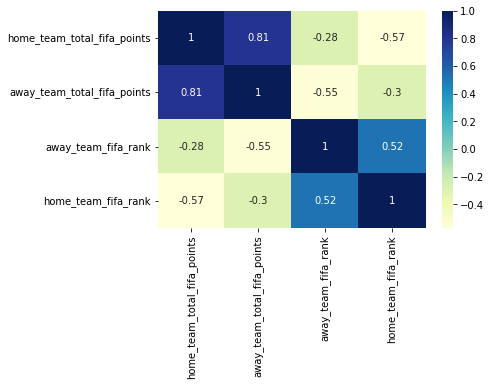

In [10]:
dataplot = sns.heatmap(df_selected.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [11]:
import torch
from torch import nn
from torch import optim

class NeuralNetwork(nn.Module):
    def __init__(self, dims):
        super(NeuralNetwork, self).__init__()
        self.input_dim = dims['input_dim']
        self.hidden1_dim = dims['hidden1_dim']
        self.hidden2_dim = dims['hidden2_dim']
        self.hidden3_dim = dims['hidden3_dim']
        self.output_dim = dims['output_dim']
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(self.input_dim, self.hidden1_dim),
            nn.ReLU(),
            nn.Linear(self.hidden1_dim, self.hidden2_dim),
            nn.ReLU(),
            nn.Linear(self.hidden2_dim, self.hidden3_dim),
            nn.ReLU(),
            nn.Linear(self.hidden3_dim, self.output_dim),
        )
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

        
dims = {'input_dim':4, 
        'hidden1_dim':10,
        'hidden2_dim':20,
        'hidden3_dim':8,
        'output_dim':3}
model = NeuralNetwork(dims)       

In [13]:
from torch.utils.data import Dataset

class MyDataset(Dataset): 
  def __init__(self,df):
    x=df.iloc[:,0:-1].values
    label = LabelEncoder()
    y= label.fit_transform(df.iloc[:,-1].values)

    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(MyDataset(train), batch_size=64, shuffle=True)
test_dataloader = DataLoader(MyDataset(test), batch_size=64, shuffle=True)

In [15]:
first_batch = next(iter(train_dataloader))
second_batch = next(iter(train_dataloader))

In [16]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.01f}%, Avg loss: {test_loss:>8f} \n")

In [17]:
# creating an instance of our model
dims = {'input_dim':4, 
        'hidden1_dim':10,
        'hidden2_dim':20,
        'hidden3_dim':8,
        'output_dim':3}
model = NeuralNetwork(dims)

# setting models mode to train mode
model.train()

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
  (softmax): Softmax(dim=1)
)

In [21]:
loss_fn = nn.CrossEntropyLoss()

#Hyperparameter
learning_rate = 1e-3
batch_size = 64
epochs = 51
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
  if(t % 10 == 0):
    print(f"Epoch {t+1}\n")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1

loss: 0.980069  [    0/ 7195]
loss: 0.885658  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.3%, Avg loss: 0.958942 

Epoch 11

loss: 0.898138  [    0/ 7195]
loss: 0.997099  [ 6400/ 7195]
Test Error: 
 Accuracy: 54.4%, Avg loss: 0.965245 

Epoch 21

loss: 0.862420  [    0/ 7195]
loss: 0.790656  [ 6400/ 7195]
Test Error: 
 Accuracy: 54.0%, Avg loss: 1.001742 

Epoch 31

loss: 0.925830  [    0/ 7195]
loss: 1.043857  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.6%, Avg loss: 0.956755 

Epoch 41

loss: 0.972274  [    0/ 7195]
loss: 0.988513  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.4%, Avg loss: 0.958410 

Epoch 51

loss: 0.886184  [    0/ 7195]
loss: 0.902011  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.2%, Avg loss: 0.965007 

Done!
Epoch 1

loss: 0.909709  [    0/ 7195]
loss: 0.991637  [ 6400/ 7195]
Test Error: 
 Accuracy: 54.6%, Avg loss: 0.962905 

Epoch 11

loss: 0.918470  [    0/ 7195]
loss: 0.930881  [ 6400/ 7195]
Test Error: 
 Accuracy: 55.4%, Avg loss: 0.955779 

Epoch 21

loss: 0.88

In [22]:
iran_points = 1564.61; iran_ranking = 20
wales_points = 1569.82; wales_ranking = 19
usa_points = 1627.48; usa_ranking = 16
england_points = 1728.47; england_ranking = 5


In [25]:
game1 = torch.tensor([iran_points, wales_points, wales_ranking, iran_ranking])
y_pred = model(game1).argmax()
if y_pred == 0:
  print(f"Model predicts that IR Iran win\n")
elif y_pred == 1:
  print(f"Model predicts draw\n")
elif y_pred == 2:
  print(f"Model predicts that Wales win\n")
game2 = torch.tensor([iran_points, england_points, england_ranking, iran_ranking])
y_pred = model(game2).argmax()
if y_pred == 0:
  print(f"Model predicts that IR Iran win\n")
elif y_pred == 1:
  print(f"Model predicts draw\n")
elif y_pred == 2:
  print(f"Model predicts that England win\n")
game3 = torch.tensor([iran_points, usa_points, usa_ranking, iran_ranking])
y_pred = model(game3).argmax()
if y_pred == 0:
  print(f"Model predicts that IR Iran win\n")
elif y_pred == 1:
  print(f"Model predicts draw\n")
elif y_pred == 2:
  print(f"Model predicts that USA win\n")

Model predicts that Wales win

Model predicts that England win

Model predicts that USA win

